In [2]:
%matplotlib inline
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
from datetime import datetime, timedelta, date
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas.io.sql as pandasql

In [3]:
# setting up pgsql connection
CONFIG = configparser.ConfigParser()
CONFIG.read('db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [4]:
# Get number of days in range
sql = pg.SQL('SELECT DISTINCT date(datetime_bin) FROM ryu4.aggr_30min')
observations = pandasql.read_sql(sql, con)
n_observations = len(observations)

In [54]:
start_date = datetime.strptime('2017-09-14', '%Y-%m-%d')
end_date =  datetime.strptime('2017-11-07', '%Y-%m-%d')

sql = pg.SQL('SELECT DISTINCT analysis_id, report_name FROM ryu4.aggr_30min')
routes = pandasql.read_sql(sql, con)
n_routes = len(routes)
am_period = ['05:30:00', '06:00:00', '06:30:00', '07:00:00', '07:30:00', '08:00:00', '08:30:00',
             '09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00']

m = 0
n = 0
route_am_peaks = []
am_peak_list = []
# Loop through all routes
for m in range(n_routes):
    analysis_id = routes.analysis_id.values[m]
    am_max = ['x',0,0,0]
    am_peak_period = 0
    # Loop through am_period, stop when out of range
    while am_period[n + 6] != am_period[-1]:
        start_time = am_period[n]
        end_time = am_period[n + 6]
        sql = pg.SQL('''SELECT report_name, analysis_id, avg(tt) avg_tt
                FROM ryu4.aggr_30min
                WHERE (datetime_bin).time >= {start_time} AND (datetime_bin).time <= {end_time}
                AND analysis_id = {analysis_id} AND weekday NOT IN (0, 6)
                GROUP BY report_name, analysis_id''').format(start_time = pg.Literal(start_time),
                                                        end_time = pg.Literal(end_time), 
                                                        analysis_id = pg.Literal(str(analysis_id)))
        result = pandasql.read_sql(sql, con)
        list_result = list(itertools.chain(result.report_name.values, result.analysis_id.values, result.avg_tt.values))
        list_result.append(n)
        if (list_result[2] > am_max[2]):
            am_max = list_result
        n += 1
    route_am_peaks.append(am_max)
    am_peak_list.append(am_max[3])
    n = 0

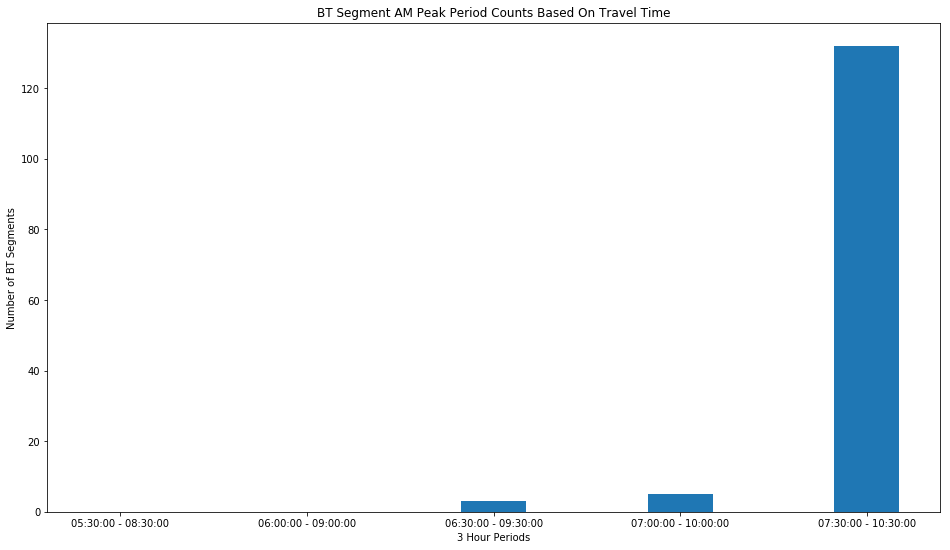

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))
am_period_labels = []
am_peak_counts = []
n = 0
while am_period[n + 6] != am_period[-1]:
    am_peak_counts.append(am_peak_list.count(n))
    period = am_period[n] + ' - ' + am_period[n + 6]
    am_period_labels.append(period)
    n += 1
index = np.arange(n)
plt.bar(index, am_peak_counts, 0.35)
plt.xlabel('3 Hour Periods')
plt.ylabel('Number of BT Segments')
plt.xticks(index, am_period_labels)
plt.title("BT Segment AM Peak Period Counts Based On Travel Time")
plt.show()

In [61]:
pm_period = ['14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00', '17:00:00', '17:30:00',
             '18:00:00', '18:30:00', '19:00:00', '19:30:00', '20:00:00']

m = 0
n = 0
route_pm_peaks = []
pm_peak_list = []
# Loop through all routes
for m in range(n_routes):
    analysis_id = routes.analysis_id.values[m]
    pm_max = ['x',0,0,0]
    pm_peak_period = 0
    # Loop through pm_period, stop when out of range
    while pm_period[n + 6] != pm_period[-1]:
        start_time = pm_period[n]
        end_time = pm_period[n + 6]
        sql = pg.SQL('''SELECT report_name, analysis_id, avg(tt) avg_tt
                FROM ryu4.aggr_30min
                WHERE (datetime_bin).time >= {start_time} AND (datetime_bin).time <= {end_time}
                AND analysis_id = {analysis_id} AND weekday NOT IN (0, 6)
                GROUP BY report_name, analysis_id''').format(start_time = pg.Literal(start_time),
                                                        end_time = pg.Literal(end_time), 
                                                        analysis_id = pg.Literal(str(analysis_id)))
        result = pandasql.read_sql(sql, con)
        list_result = list(itertools.chain(result.report_name.values, result.analysis_id.values, result.avg_tt.values))
        list_result.append(n)
        if (list_result[2] > pm_max[2]):
            pm_max = list_result
        n += 1
    route_pm_peaks.append(pm_max)
    pm_peak_list.append(pm_max[3])
    n = 0

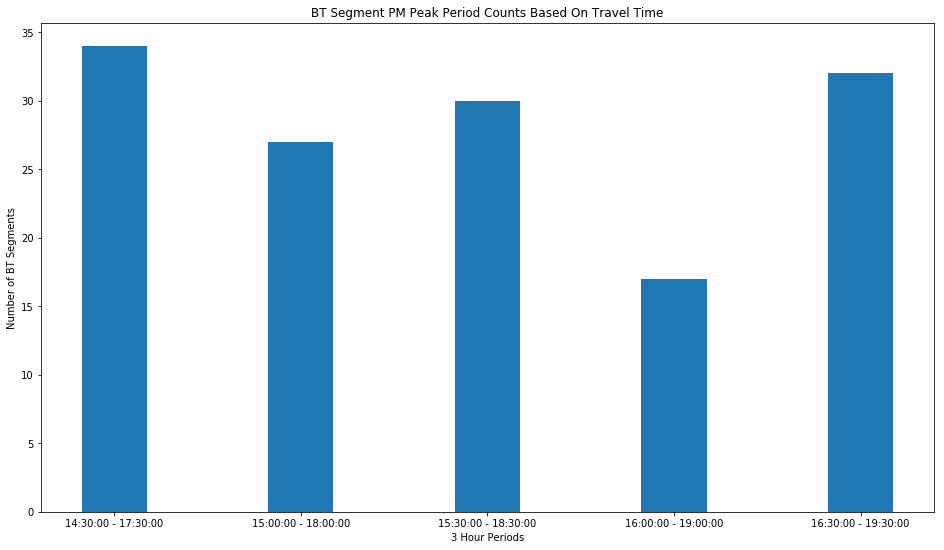

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))
pm_period_labels = []
pm_peak_counts = []
n = 0
while pm_period[n + 6] != pm_period[-1]:
    pm_peak_counts.append(pm_peak_list.count(n))
    period = pm_period[n] + ' - ' + pm_period[n + 6]
    pm_period_labels.append(period)
    n += 1
index = np.arange(n)
plt.bar(index, pm_peak_counts, 0.35)
plt.xlabel('3 Hour Periods')
plt.ylabel('Number of BT Segments')
plt.xticks(index, pm_period_labels)
plt.title("BT Segment PM Peak Period Counts Based On Travel Time")
plt.show()